# Datensatzanlayse

Die Datensatzanalyse wird hier exemplarisch an den Daten für das Jahr 2023 durchgeführt und kann analog auf die Jahre 2019-2024 angewandt werden.
Der Datensatz wurde zusätzlich beim Export vorbereinigt.


In [63]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, round
import glob
import os

In [64]:
print(os.getcwd())


/Users/timonowag/src/PA2/src


In [65]:
# Creating SparkSession
spark = SparkSession.builder \
    .appName("ReadMultipleCSVs") \
    .getOrCreate()

# Path to the CSV files
csv_files_path = "../data/*.csv"

# Find all CSV files in the given path
csv_files = glob.glob(csv_files_path)

# Dictinary to store the DataFrames
dataframes = {}

# Read all CSV files and store them in the dictionary
for file in csv_files:
    
    file_name = file.split('/')[-1].replace('.csv', '')
    
    df = spark.read.csv(file, header=True, inferSchema=True)
    
    dataframes[file_name] = df
    print(f"{file_name} eingelesen und als Variable gespeichert.")

# Show the DataFrames
for name, df in dataframes.items():
    print(f"DataFrame für {name}:")
    df.show()


ActionLog2023 eingelesen und als Variable gespeichert.
DataFrame für ActionLog2023:
+---------+----------+--------------+--------------+-------------+----------------+-------------------+-------------------+-------------------+------------------------+----------------------+-------------------------+-----------------------+-------------+---------------+
| actionid|casenumber|actionposition|actiontypecode|   actiontype|actionstatuscode|       utcstartdate|         utcenddate|           duration|actioneditororganisation|actioneditordepartment|actioncreatororganisation|actioncreatordepartment|referencetype|actioncallstate|
+---------+----------+--------------+--------------+-------------+----------------+-------------------+-------------------+-------------------+------------------------+----------------------+-------------------------+-----------------------+-------------+---------------+
|923035746|   7937687|             3|            10|Outgoing call|              20|2023-01-02 00:56:

In [66]:
df.filter(col("actiontypecode") == 68).show()

+---------+----------+--------------+--------------+----------+----------------+-------------------+----------+--------+------------------------+----------------------+-------------------------+-----------------------+-------------+---------------+
| actionid|casenumber|actionposition|actiontypecode|actiontype|actionstatuscode|       utcstartdate|utcenddate|duration|actioneditororganisation|actioneditordepartment|actioncreatororganisation|actioncreatordepartment|referencetype|actioncallstate|
+---------+----------+--------------+--------------+----------+----------------+-------------------+----------+--------+------------------------+----------------------+-------------------------+-----------------------+-------------+---------------+
|923562124|   7978239|             4|            68| NSC > RSC|              20|2023-01-23 05:51:40|      NULL|    NULL|                HEADLAND|               SERVICE|                 HEADLAND|                SERVICE|         NULL|           NULL|
|923

In [67]:
df.count()

5534723

In [68]:
from pyspark.sql.functions import col, sum

# Count the number of NULL values in each column
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

null_counts.show()


+--------+----------+--------------+--------------+----------+----------------+------------+----------+--------+------------------------+----------------------+-------------------------+-----------------------+-------------+---------------+
|actionid|casenumber|actionposition|actiontypecode|actiontype|actionstatuscode|utcstartdate|utcenddate|duration|actioneditororganisation|actioneditordepartment|actioncreatororganisation|actioncreatordepartment|referencetype|actioncallstate|
+--------+----------+--------------+--------------+----------+----------------+------------+----------+--------+------------------------+----------------------+-------------------------+-----------------------+-------------+---------------+
|       0|         0|             0|             0|         0|               0|          13|   2146102| 2117014|                    3534|                  3534|                        0|                      0|      2228056|        5109048|
+--------+----------+--------------+

In [69]:
from pyspark.sql.functions import count, round

# Count the number of rows in the DataFrame
total_count = df.count()

# Calculate the relative frequency for actiontypecode
actiontypecode_freq = df.groupBy('actiontypecode').agg((count('actiontypecode') / total_count).alias('relative_frequency'))

# Calculate the relative frequency for actionstatuscode
actionstatuscode_freq = df.groupBy('actionstatuscode').agg((count('actionstatuscode') / total_count).alias('relative_frequency'))

# Calculate the relative frequency for actioncreatororganisation
actioncreatororganisation_freq = df.groupBy('actioncreatororganisation').agg((count('actioncreatororganisation') / total_count).alias('relative_frequency'))

# Calculate the relative frequency for actioncreatordepartment
actioncreatordepartment_freq = df.groupBy('actioncreatordepartment').agg((count('actioncreatordepartment') / total_count).alias('relative_frequency'))

# Round the relative frequency to two decimal places
actiontypecode_freq = actiontypecode_freq.withColumn('relative_frequency', round('relative_frequency', 2)) 
actionstatuscode_freq = actionstatuscode_freq.withColumn('relative_frequency', round('relative_frequency', 2)) 
actioncreatororganisation_freq = actioncreatororganisation_freq.withColumn('relative_frequency', round('relative_frequency', 2)) 
actioncreatordepartment_freq = actioncreatordepartment_freq.withColumn('relative_frequency', round('relative_frequency', 2)) 

# Sort the DataFrames by relative frequency in descending order
actiontypecode_freq = actiontypecode_freq.orderBy('relative_frequency', ascending=False)
actionstatuscode_freq = actionstatuscode_freq.orderBy('relative_frequency', ascending=False)
actioncreatororganisation_freq = actioncreatororganisation_freq.orderBy('relative_frequency', ascending=False)
actioncreatordepartment_freq = actioncreatordepartment_freq.orderBy('relative_frequency', ascending=False)

# Show the DataFrames
print('Relative Häufigkeit für actiontypecode:')
actiontypecode_freq.show()
print('Relative Häufigkeit für actionstatuscode:')
actionstatuscode_freq.show()
print('Relative Häufigkeit für actioncreatororganisation:')
actioncreatororganisation_freq.show()
print('Relative Häufigkeit für actioncreatordepartment:')
actioncreatordepartment_freq.show()

# Filter the DataFrames for the codes 64 and 68
print('Häufigkeit für die Codes 64 und 68 bei actiontypecode:')
actiontypecode_freq.filter(actiontypecode_freq.actiontypecode.isin(64, 68)).show()

print('Häufigkeit für die Codes 64 und 68 bei actionstatuscode:')
actionstatuscode_freq.filter(actionstatuscode_freq.actionstatuscode.isin(64, 68)).show()


Relative Häufigkeit für actiontypecode:


+--------------+------------------+
|actiontypecode|relative_frequency|
+--------------+------------------+
|            40|              0.09|
|            91|              0.08|
|            10|              0.08|
|             5|              0.07|
|            55|              0.07|
|            50|              0.07|
|            62|              0.07|
|            46|              0.06|
|            85|              0.03|
|            83|              0.03|
|           136|              0.03|
|            90|              0.02|
|           302|              0.02|
|           306|              0.02|
|           307|              0.02|
|           303|              0.02|
|           313|              0.02|
|           130|              0.01|
|            51|              0.01|
|            97|              0.01|
+--------------+------------------+
only showing top 20 rows

Relative Häufigkeit für actionstatuscode:


+----------------+------------------+
|actionstatuscode|relative_frequency|
+----------------+------------------+
|              20|              0.93|
|               0|              0.07|
|              10|               0.0|
+----------------+------------------+

Relative Häufigkeit für actioncreatororganisation:


+-------------------------+------------------+
|actioncreatororganisation|relative_frequency|
+-------------------------+------------------+
|                     TWDE|              0.19|
|                   TRUMPF|              0.14|
|                      TUS|              0.12|
|                      TJP|              0.06|
|                     TCNW|              0.04|
|                      TES|              0.03|
|                      TIT|              0.03|
|                      TKR|              0.03|
|                      JFY|              0.02|
|                     TCNL|              0.02|
|                       TW|              0.02|
|                      TLS|              0.02|
|                      TFR|              0.02|
|                      TGB|              0.02|
|                      TLD|              0.02|
|                      TAT|              0.02|
|                      TIN|              0.01|
|                      TPL|              0.01|
|            

+-----------------------+------------------+
|actioncreatordepartment|relative_frequency|
+-----------------------+------------------+
|                   APPS|              0.14|
|                SERVICE|              0.11|
|                  ADMIN|              0.08|
|               LASER-2D|              0.06|
|                  LASER|              0.06|
|                  PUNCH|              0.05|
|             SERVICE-MT|              0.05|
|                 CADCAM|              0.05|
|                   BEND|              0.04|
|          SPAREPARTS_BO|              0.03|
|             SPAREPARTS|              0.02|
|                    CCS|              0.02|
|          SERVICE_WM_SH|              0.01|
|               LASER-MT|              0.01|
|            CALLDESK-MT|              0.01|
|                    SCC|              0.01|
|                    NSC|              0.01|
|               TRULASER|              0.01|
|             SERVICE-LT|              0.01|
|         

+--------------+------------------+
|actiontypecode|relative_frequency|
+--------------+------------------+
|            64|               0.0|
|            68|               0.0|
+--------------+------------------+

Häufigkeit für die Codes 64 und 68 bei actionstatuscode:


+----------------+------------------+
|actionstatuscode|relative_frequency|
+----------------+------------------+
+----------------+------------------+



In [70]:
from pyspark.sql.functions import when

# Group the duration into bins
duration_distribution = df.withColumn(
    'duration_bin',
    when(df['duration'] < 10, '< 10')
    .when((df['duration'] >= 10) & (df['duration'] < 20), '10-20')
    .when((df['duration'] >= 20) & (df['duration'] < 30), '20-30')
    .when((df['duration'] >= 30) & (df['duration'] < 40), '30-40')
    .when((df['duration'] >= 40) & (df['duration'] < 50), '40-50')
    .otherwise('50+')
)

# Calculate the frequency of each bin
duration_distribution_freq = duration_distribution.groupBy('duration_bin').count().orderBy('duration_bin')
duration_distribution_freq.show()


+------------+-------+
|duration_bin|  count|
+------------+-------+
|       10-20| 227725|
|       20-30| 130558|
|       30-40|  88092|
|       40-50|  63634|
|         50+|2802728|
|        < 10|2221986|
+------------+-------+



In [71]:
from pyspark.sql.functions import mean, min, max, stddev, percentile_approx

# Calculate statistics for the duration column
duration_stats = df.agg(
    mean('duration').alias('mean'),
    min('duration').alias('min'),
    max('duration').alias('max'),
    stddev('duration').alias('stddev'),
    percentile_approx('duration', 0.5).alias('median')  # Median approximiert
)

duration_stats.show()


+------------------+-------+-----------------+------------------+------+
|              mean|    min|              max|            stddev|median|
+------------------+-------+-----------------+------------------+------+
|1725.6459034880047|-1440.0|901684.5166666667|18984.030696832604|   1.5|
+------------------+-------+-----------------+------------------+------+



In [72]:
from pyspark.sql.functions import year, month

# Count the number of actions per month
monthly_action_counts = df.withColumn("year", year("utcstartdate")) \
                          .withColumn("month", month("utcstartdate")) \
                          .groupBy("year", "month") \
                          .count() \
                          .orderBy("year", "month")

# Show the monthly action counts
monthly_action_counts.show()


+----+-----+------+
|year|month| count|
+----+-----+------+
|NULL| NULL|    13|
|2023|    1|332104|
|2023|    2|394282|
|2023|    3|466991|
|2023|    4|389375|
|2023|    5|442950|
|2023|    6|473579|
|2023|    7|458636|
|2023|    8|504317|
|2023|    9|475831|
|2023|   10|487646|
|2023|   11|478472|
|2023|   12|398189|
|2024|    1|105760|
|2024|    2| 43831|
|2024|    3| 26161|
|2024|    4| 16476|
|2024|    5| 11438|
|2024|    6|  9292|
|2024|    7|  6093|
+----+-----+------+
only showing top 20 rows



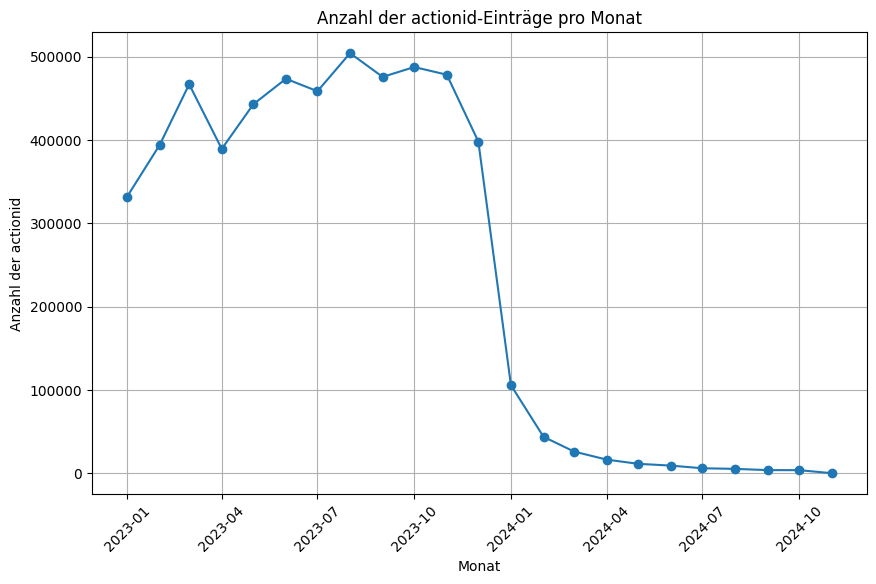

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to a Pandas DataFrame
monthly_action_counts_pd = monthly_action_counts.toPandas()

# Combine the year and month columns to a single date column
monthly_action_counts_pd['date'] = pd.to_datetime(monthly_action_counts_pd[['year', 'month']].assign(day=1))

# Sort the DataFrame by date
monthly_action_counts_pd = monthly_action_counts_pd.sort_values('date')

# Plot the number of actionid entries per month
plt.figure(figsize=(10, 6))
plt.plot(monthly_action_counts_pd['date'], monthly_action_counts_pd['count'], marker='o')
plt.xlabel('Monat')
plt.ylabel('Anzahl der actionid')
plt.title('Anzahl der actionid-Einträge pro Monat')
plt.xticks(rotation=45)
plt.grid()

plt.show()


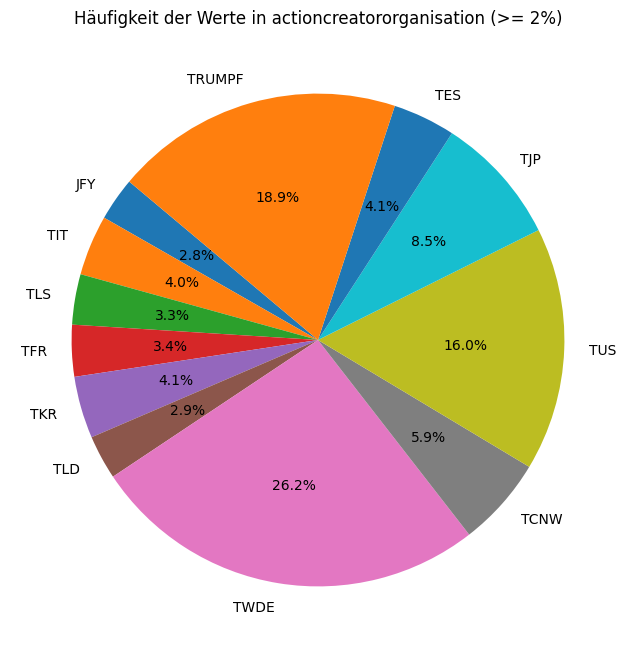

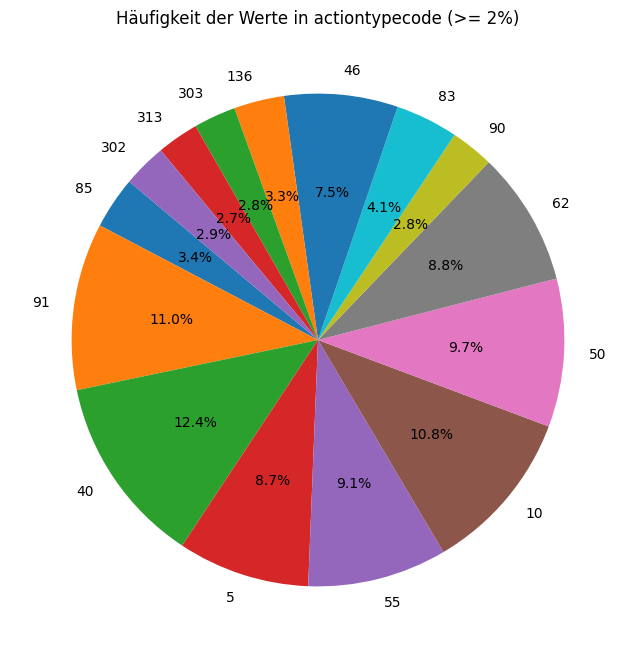

In [74]:
import matplotlib.pyplot as plt

# Calculate the total number of entries in the DataFrame
total_count = df.count()

# Filter the actioncreatororganisation column to include only values with a frequency of at least 2%
actioncreatororganisation_freq = df.groupBy('actioncreatororganisation').count()
actioncreatororganisation_freq = actioncreatororganisation_freq.withColumn('percentage', (actioncreatororganisation_freq['count'] / total_count) * 100)
actioncreatororganisation_freq_filtered = actioncreatororganisation_freq.filter(actioncreatororganisation_freq['percentage'] >= 2).toPandas()

# Filter the actiontypecode column to include only values with a frequency of at least 2%
actiontypecode_freq = df.groupBy('actiontypecode').count()
actiontypecode_freq = actiontypecode_freq.withColumn('percentage', (actiontypecode_freq['count'] / total_count) * 100)
actiontypecode_freq_filtered = actiontypecode_freq.filter(actiontypecode_freq['percentage'] >= 2).toPandas()

# Pie chart for actioncreatororganisation (only entries >= 2%)
plt.figure(figsize=(8, 8))
plt.pie(actioncreatororganisation_freq_filtered['count'], labels=actioncreatororganisation_freq_filtered['actioncreatororganisation'],
        autopct='%1.1f%%', startangle=140)
plt.title('Häufigkeit der Werte in actioncreatororganisation (>= 2%)')
plt.show()

# Pie chart for actiontypecode (only entries >= 2%)
plt.figure(figsize=(8, 8))
plt.pie(actiontypecode_freq_filtered['count'], labels=actiontypecode_freq_filtered['actiontypecode'],
        autopct='%1.1f%%', startangle=140)
plt.title('Häufigkeit der Werte in actiontypecode (>= 2%)')
plt.show()


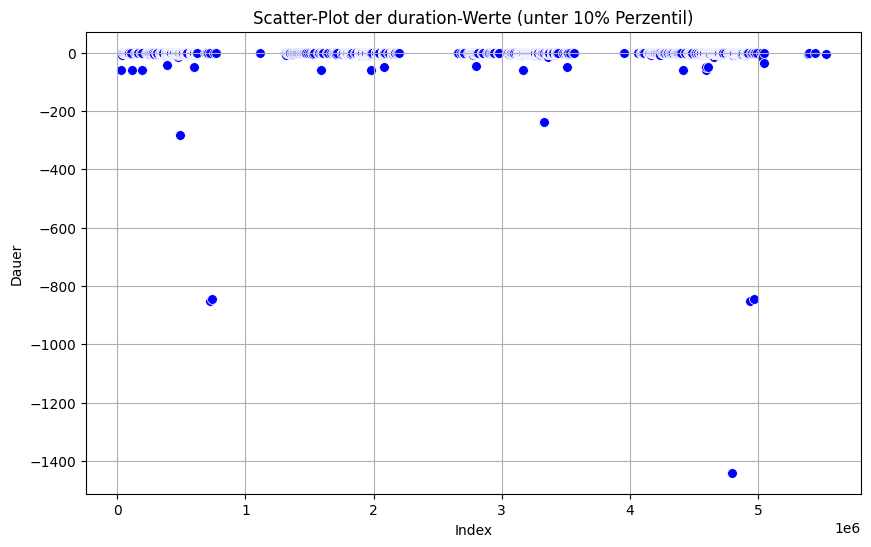

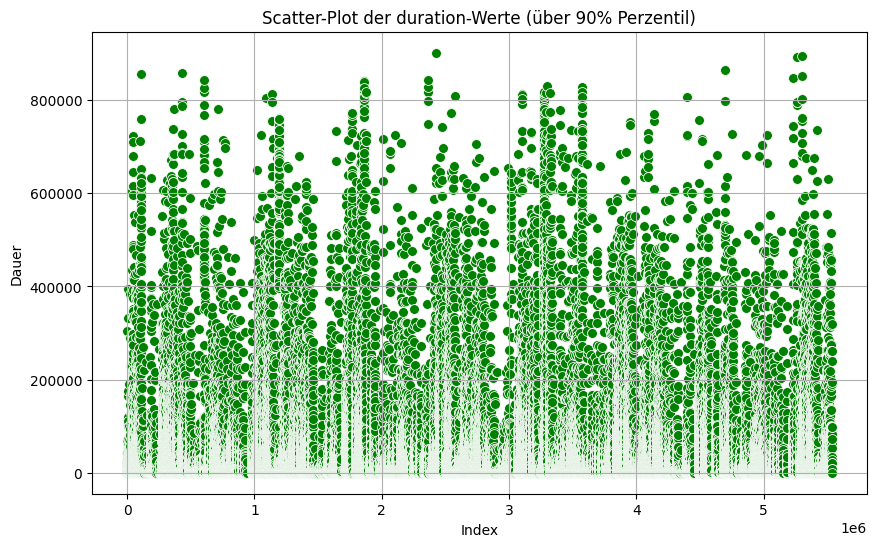

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the duration column to a Pandas DataFrame
df_pd = df.select('duration').toPandas()

# Calculate the 10th and 90th percentiles
q10 = df_pd['duration'].quantile(0.10)
q90 = df_pd['duration'].quantile(0.90)

# Filter the values below the 10th percentile
below_10_df_pd = df_pd[df_pd['duration'] < q10]

# Filter the values above the 90th percentile
above_90_df_pd = df_pd[df_pd['duration'] > q90]

# Scatter-Plot for values below the 10th percentile
plt.figure(figsize=(10, 6))
sns.scatterplot(data=below_10_df_pd, x=below_10_df_pd.index, y='duration', s=50, color='b')
plt.title('Scatter-Plot der duration-Werte (unter 10% Perzentil)')
plt.xlabel('Index')
plt.ylabel('Dauer')
plt.grid(True)
plt.show()

# Scatter-Plot for values above the 90th percentile
plt.figure(figsize=(10, 6))
sns.scatterplot(data=above_90_df_pd, x=above_90_df_pd.index, y='duration', s=50, color='g')
plt.title('Scatter-Plot der duration-Werte (über 90% Perzentil)')
plt.xlabel('Index')
plt.ylabel('Dauer')
plt.grid(True)
plt.show()


In [76]:
# Filter the rows with negative duration values
negative_duration_df = df.filter(df['duration'] < 0)

negative_duration_df.show()


+---------+----------+--------------+--------------+-------------+----------------+-------------------+-------------------+--------------------+------------------------+----------------------+-------------------------+-----------------------+-------------+---------------+
| actionid|casenumber|actionposition|actiontypecode|   actiontype|actionstatuscode|       utcstartdate|         utcenddate|            duration|actioneditororganisation|actioneditordepartment|actioncreatororganisation|actioncreatordepartment|referencetype|actioncallstate|
+---------+----------+--------------+--------------+-------------+----------------+-------------------+-------------------+--------------------+------------------------+----------------------+-------------------------+-----------------------+-------------+---------------+
|925314581|   8113226|             3|            10|Outgoing call|              20|2023-03-26 03:01:01|2023-03-26 03:01:06| -59.916666666666664|                     JFY|            

In [82]:
# Clean the DataFrame by removing rows with negative duration values
cleaned_df = df.filter((df['duration'] >= 0) | (df['duration'].isNull()))

# Save the cleaned DataFrame to a CSV file
cleaned_df.write.csv('../data/ActionLog2023cleaned', header=True, mode='overwrite')


In [84]:
cleaned_df.filter(col("actiontypecode") == 64).show()

+---------+----------+--------------+--------------+----------+----------------+-------------------+----------+--------+------------------------+----------------------+-------------------------+-----------------------+-------------+---------------+
| actionid|casenumber|actionposition|actiontypecode|actiontype|actionstatuscode|       utcstartdate|utcenddate|duration|actioneditororganisation|actioneditordepartment|actioncreatororganisation|actioncreatordepartment|referencetype|actioncallstate|
+---------+----------+--------------+--------------+----------+----------------+-------------------+----------+--------+------------------------+----------------------+-------------------------+-----------------------+-------------+---------------+
|923050992|   7938684|             4|            64| NSC > SCC|              20|2023-01-02 14:00:23|      NULL|    NULL|                     TNL|                 LASER|                      TNL|                  LASER|         NULL|           NULL|
|923